In [53]:
import numpy as np
import pandas as pd
import pickle
#import seaborn as sns
import matplotlib.pyplot as plt
import math

In [54]:
#Retrieve pickle object
fileObj = open('data_algos.pkl', 'rb')
all_generations = pickle.load(fileObj)
fileObj.close()

In [55]:
generations_df = pd.DataFrame(all_generations)
generations_df.tail(15)
#generations_df.sample(15)

,radius,generation,fitness,selection_type,pop_size,mutation
1649985,9.926299,199,0.001600,Wheel Selection,100,0.1
1649986,10.240787,199,0.001504,Wheel Selection,100,0.1
1649987,10.325933,199,0.001480,Wheel Selection,100,0.1
1649988,10.805676,199,0.001353,Wheel Selection,100,0.1
1649989,11.219043,199,0.001256,Wheel Selection,100,0.1
1649990,12.244907,199,0.001056,Wheel Selection,100,0.1
1649991,13.121996,199,0.000920,Wheel Selection,100,0.1
1649992,15.966125,199,0.000623,Wheel Selection,100,0.1
1649993,16.971389,199,0.000551,Wheel Selection,100,0.1
1649994,17.199359,199,0.000537,Wheel Selection,100,0.1



## Investigation into Population Mean

The utilization of only 8 bits to encode individuals imposes a significant constraint on the range of values we can possibly discover, because of this the optimal solution our algorithm could discover was limited to 1.68539 cm. Recognizing this limitation, we have undertaken a study focusing on the mean of each generated population.

Calculating the mean of the population offers an advantage by allowing us to bypass the minimum step and potentially discover more refined results. Our analysis reveals that the best result, obtained through mean calculation across populations (divided by mutation, generation, population size and selection type), yields a best radius of 1.68392 cm. This result is notably closer to the actual optimal solution of 1.68389 cm.

Consequently, our research now centers on the exploration of population means to gain insights into potentially improved solutions.

In [57]:
def fitness (r):
    ''' 
    Calculates fitness of the proposed radius
    Based on the fitness equation: 1/(2 * (pi) * (r**2) + (60/r))
    Derived from the optimisation problem

    Inputs:
        r       :   Radius -> type = (int, float)

    Outputs
        fitness :   Fitness -> type = (float)
    '''
    #r=d/2
    area = (2 * (math.pi) * (r**2) + (60/r))
    fitness = 1/area
    return fitness

#Calculating best result with populations mean
grouped_pop = generations_df.groupby(by=['mutation', 'generation', 'selection_type', 'pop_size']).mean()

grouped_pop['fitness']=fitness(grouped_pop['radius'])
max_fit_row = grouped_pop.loc[grouped_pop['fitness'].idxmax()]

print("Best population mean:")
print(max_fit_row)

Best population mean:
radius     1.68389
fitness    0.01871
Name: (0.001, 61, Ranked Selection, 70), dtype: float64


## Impact of Population size and Mutation rates on results 

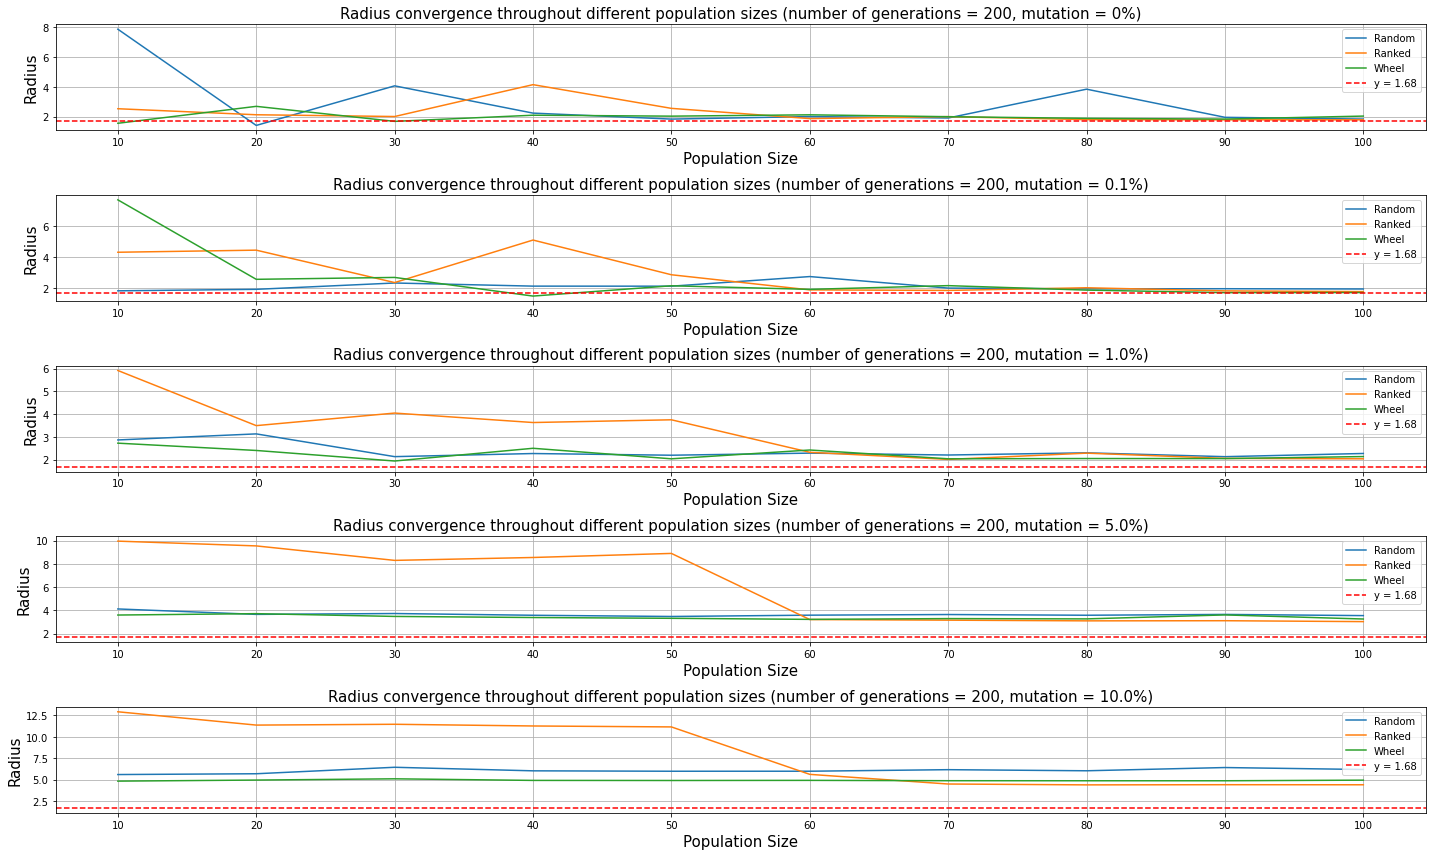

In [58]:
#Visualising the impact of pop_size on results
mutation_rates = [0, 0.001, 0.01, 0.05, 0.1]

# Define a function to create subplots for a given mutation rate
def pop_subplot(mutation_rate, subplot_index):
    mutation_df = generations_df[generations_df['mutation'] == mutation_rate]
    grouped_pop = mutation_df.groupby(by=['selection_type', 'pop_size']).mean()

    num_of_gen=generations_df['generation'].max()+1
    
    gen_size = len(grouped_pop.loc['Random Selection', 'radius'])#defines list of pop_size(s) for plot x-axis labelling
    
    x1 = range(gen_size)
    y1 = grouped_pop.loc['Random Selection', 'radius']
    y2 = grouped_pop.loc['Ranked Selection', 'radius']
    y3 = grouped_pop.loc['Wheel Selection', 'radius']

    plt.subplot(5, 1, subplot_index)
    plt.title(f'Radius convergence throughout different population sizes (number of generations = {num_of_gen}, mutation = {mutation_rate * 100}%)', fontsize=15)
    plt.xlabel('Population Size', fontsize=15)
    plt.ylabel('Radius', fontsize=15)

    plt.plot(x1, y1, label='Random')
    plt.plot(x1, y2, label='Ranked')
    plt.plot(x1, y3, label='Wheel')

    plt.grid()
    plt.axhline(y=1.6841, color='r', linestyle='--', label='y = 1.68')
    plt.legend()

    plt.xticks(range(len(grouped_pop.loc['Random Selection', 'radius'])), labels=grouped_pop.loc['Random Selection', 'radius'].index)


# Create subplots using a for loop
plt.rcParams["figure.figsize"] = (20, 12)
i=1
for mutation_rate in mutation_rates:
    pop_subplot(mutation_rate, i)
    i+=1

plt.tight_layout()
plt.show()


Methods are generally all converging when the population size reaches 60 individuals. Adding more individuals doesn't notably impact the outcome.

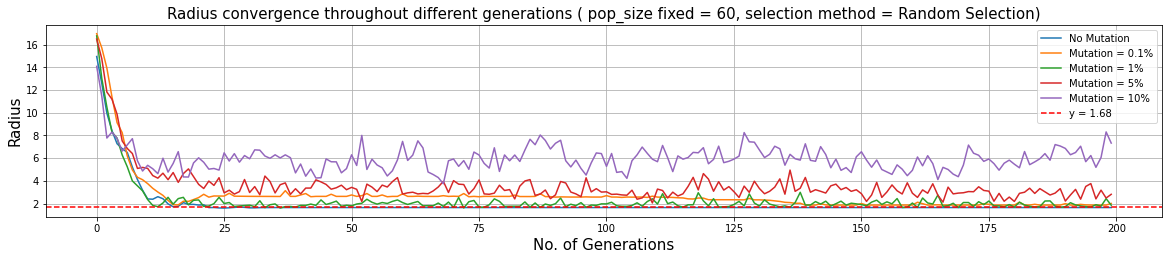

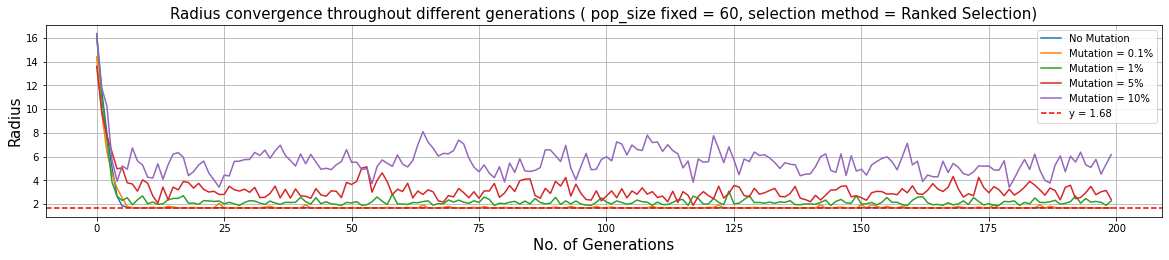

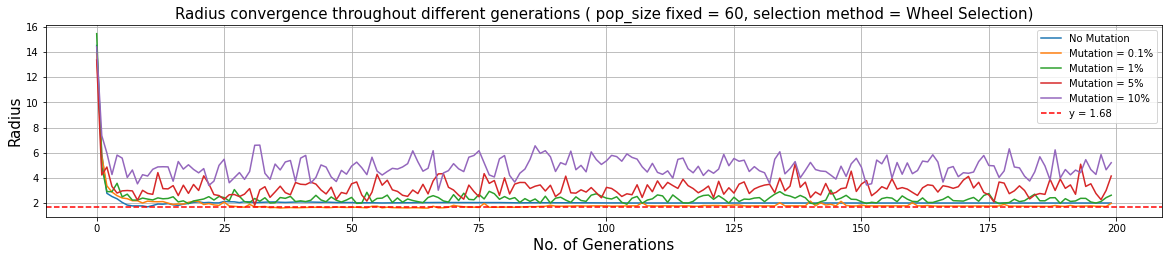

<Figure size 1440x864 with 0 Axes>

In [59]:
#Visualising the results of different mutation rates on the population
#1. Filtering data by optimal population size
ideal_pop_size = 60
mutation_generations_df= generations_df[generations_df['pop_size']== ideal_pop_size]
selection_methods=['Random Selection','Ranked Selection','Wheel Selection']

# Define a function to create subplots for a given selection method
def sel_subplot(selection, subplot_index):
    mutation_generations_method_df= mutation_generations_df[mutation_generations_df['selection_type']==selection]
    grouped_pop = mutation_generations_method_df.groupby(by=['mutation','generation','selection_type']).mean()
    cutoff_point=generations_df['generation'].max()+1

    x1 = range(cutoff_point)
    y1 = (grouped_pop['radius'].values)[:cutoff_point]
    y2 = (grouped_pop['radius'].values)[cutoff_point:2*cutoff_point]
    y3 = (grouped_pop['radius'].values)[2*cutoff_point:3*cutoff_point]
    y4 = (grouped_pop['radius'].values)[3*cutoff_point:4*cutoff_point]
    y5 = (grouped_pop['radius'].values)[4*cutoff_point:]

    plt.subplot(3,1, subplot_index)
    plt.title(f'Radius convergence throughout different generations ( pop_size fixed = {ideal_pop_size}, selection method = {selection})',fontsize=15)
    plt.xlabel('No. of Generations',fontsize=15)
    plt.ylabel('Radius',fontsize=15)

    plt.plot(x1,y1, label = 'No Mutation') 
    plt.plot(x1,y2,label = 'Mutation = 0.1%')
    plt.plot(x1,y3,label = 'Mutation = 1%') 
    plt.plot(x1,y4, label = 'Mutation = 5%')  
    plt.plot(x1,y5, label = 'Mutation = 10%')


    plt.grid()

    plt.axhline(y=1.6841, color='r', linestyle='--', label='y = 1.68')
    #plt.xticks(range(len(grouped_pop.loc['Random Selection', 'radius'])), labels=grouped_pop.loc['Random Selection', 'radius'].index)
    plt.legend()

    plt.show()
    plt.close()
    

# Create subplots using a for loop
plt.rcParams["figure.figsize"] = (20, 12)
i=1
for selection in selection_methods:
    sel_subplot(selection, i)
    i+=1

plt.tight_layout()
plt.show()

Mutations exceeding 1% introduce too much variability, becoming counterproductive to the results.
When methods converge they do it before 25 generations.

### Visualising the results of different mutation rates (5% and 10% excluded )on the population smaller generation window

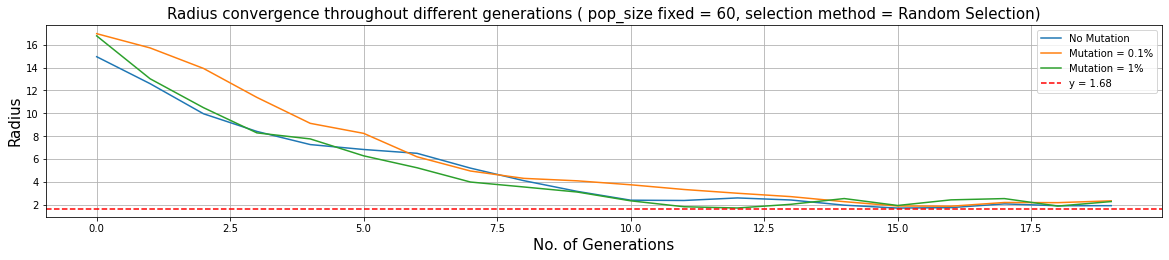

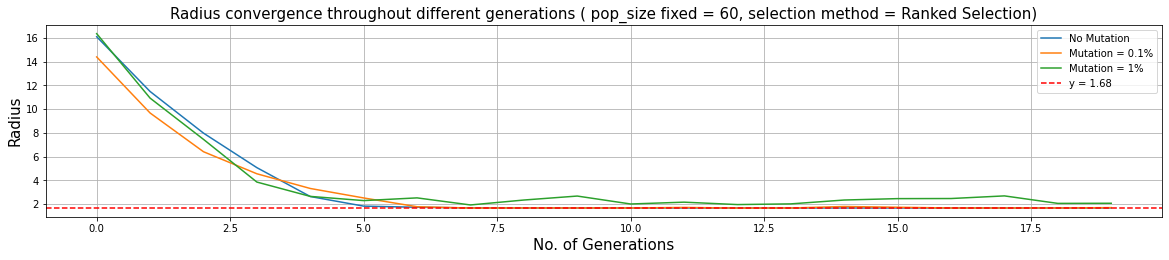

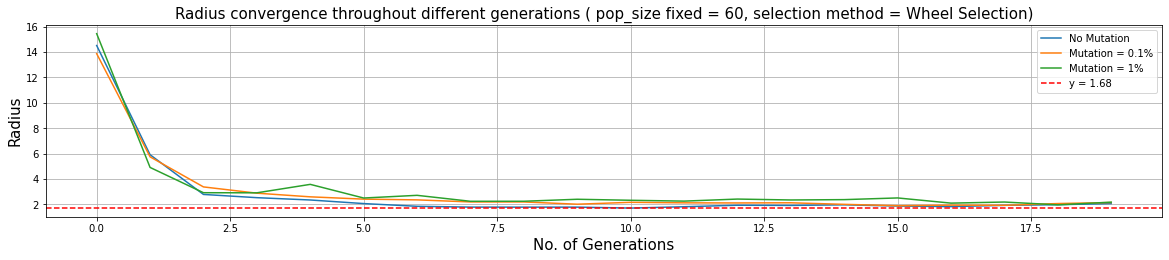

<Figure size 1440x864 with 0 Axes>

In [60]:


#1. Filtering data by optimal population size
ideal_pop_size = 60
gen_ideal = 20
mutation_generations_df= generations_df[generations_df['pop_size']== ideal_pop_size]
selection_methods=['Random Selection','Ranked Selection','Wheel Selection']

# Define a function to create subplots for a given selection method
def sel_subplot(selection, subplot_index):
    mutation_generations_method_df= mutation_generations_df[mutation_generations_df['selection_type']==selection]
    grouped_pop = mutation_generations_method_df.groupby(by=['mutation','generation','selection_type']).mean()
    cutoff_point=generations_df['generation'].max()+1

    x1 = range(cutoff_point)
    x1 = x1[:gen_ideal]
    y1 = (grouped_pop['radius'].values)[:cutoff_point]
    y2 = (grouped_pop['radius'].values)[cutoff_point:2*cutoff_point]
    y3 = (grouped_pop['radius'].values)[2*cutoff_point:3*cutoff_point]

    plt.subplot(3,1, subplot_index)
    plt.title(f'Radius convergence throughout different generations ( pop_size fixed = {ideal_pop_size}, selection method = {selection})',fontsize=15)
    plt.xlabel('No. of Generations',fontsize=15)
    plt.ylabel('Radius',fontsize=15)

    plt.plot(x1,y1[:gen_ideal], label = 'No Mutation') 
    plt.plot(x1,y2[:gen_ideal],label = 'Mutation = 0.1%')
    plt.plot(x1,y3[:gen_ideal],label = 'Mutation = 1%') 



    plt.grid()

    plt.axhline(y=1.6841, color='r', linestyle='--', label='y = 1.68')
    plt.legend()

    plt.show()
    plt.close()
    

# Create subplots using a for loop
plt.rcParams["figure.figsize"] = (20, 12)
i=1
for selection in selection_methods:
    sel_subplot(selection, i)
    i+=1

plt.tight_layout()
plt.show()

# ERROR ANALYSIS
### Calculating the MSE

In [61]:
ideal_pop_size = 60
solution = 1.68389
mutation_rates = [0, 0.001, 0.01, 0.05, 0.1]
number_of_generations = 20
selection_types = ['Random Selection', 'Ranked Selection', 'Wheel Selection']

generations_df=generations_df[(generations_df['pop_size'] == ideal_pop_size)]

# Dictionary to memorize MSE for each mutation rate and selection type
mse_results = {rate: {sel_type: [] for sel_type in selection_types} for rate in mutation_rates}

for mutation_rate in mutation_rates:
    filtered_generations_df = generations_df[(generations_df['mutation'] == mutation_rate)]

    for selection_type in selection_types:
        selected_df = filtered_generations_df[filtered_generations_df['selection_type'] == selection_type]
        MSES = []

        for k in range(number_of_generations):
            gen_df = selected_df[selected_df['generation'] == k]
            squared_errors = (gen_df['radius'] - solution) ** 2
            MSE = sum(squared_errors) / ideal_pop_size
            MSES.append(MSE)

        mse_results[mutation_rate][selection_type] = MSES

#Seeing the results
for mutation in mutation_rates:
    print(f"Mutation rate {mutation}:")
    for selection in selection_types:
        print(f"{selection} MSE: {mse_results[mutation][selection][-1]} (Gen {number_of_generations})")
    print("\n" + "-"*40 + "\n")


Mutation rate 0:
Random Selection MSE: 0.1156531179968434 (Gen 20)
Ranked Selection MSE: 2.46033256425358e-07 (Gen 20)
Wheel Selection MSE: 0.32450372574510505 (Gen 20)

----------------------------------------

Mutation rate 0.001:
Random Selection MSE: 0.9641822539923605 (Gen 20)
Ranked Selection MSE: 0.058626785773779354 (Gen 20)
Wheel Selection MSE: 0.7994223517098237 (Gen 20)

----------------------------------------

Mutation rate 0.01:
Random Selection MSE: 5.5415862353956316 (Gen 20)
Ranked Selection MSE: 1.3020661404736202 (Gen 20)
Wheel Selection MSE: 0.8100871627051489 (Gen 20)

----------------------------------------

Mutation rate 0.05:
Random Selection MSE: 19.17814182595357 (Gen 20)
Ranked Selection MSE: 18.17928775214276 (Gen 20)
Wheel Selection MSE: 17.115684228061 (Gen 20)

----------------------------------------

Mutation rate 0.1:
Random Selection MSE: 55.31262192995765 (Gen 20)
Ranked Selection MSE: 36.30119375522149 (Gen 20)
Wheel Selection MSE: 34.0329989598457

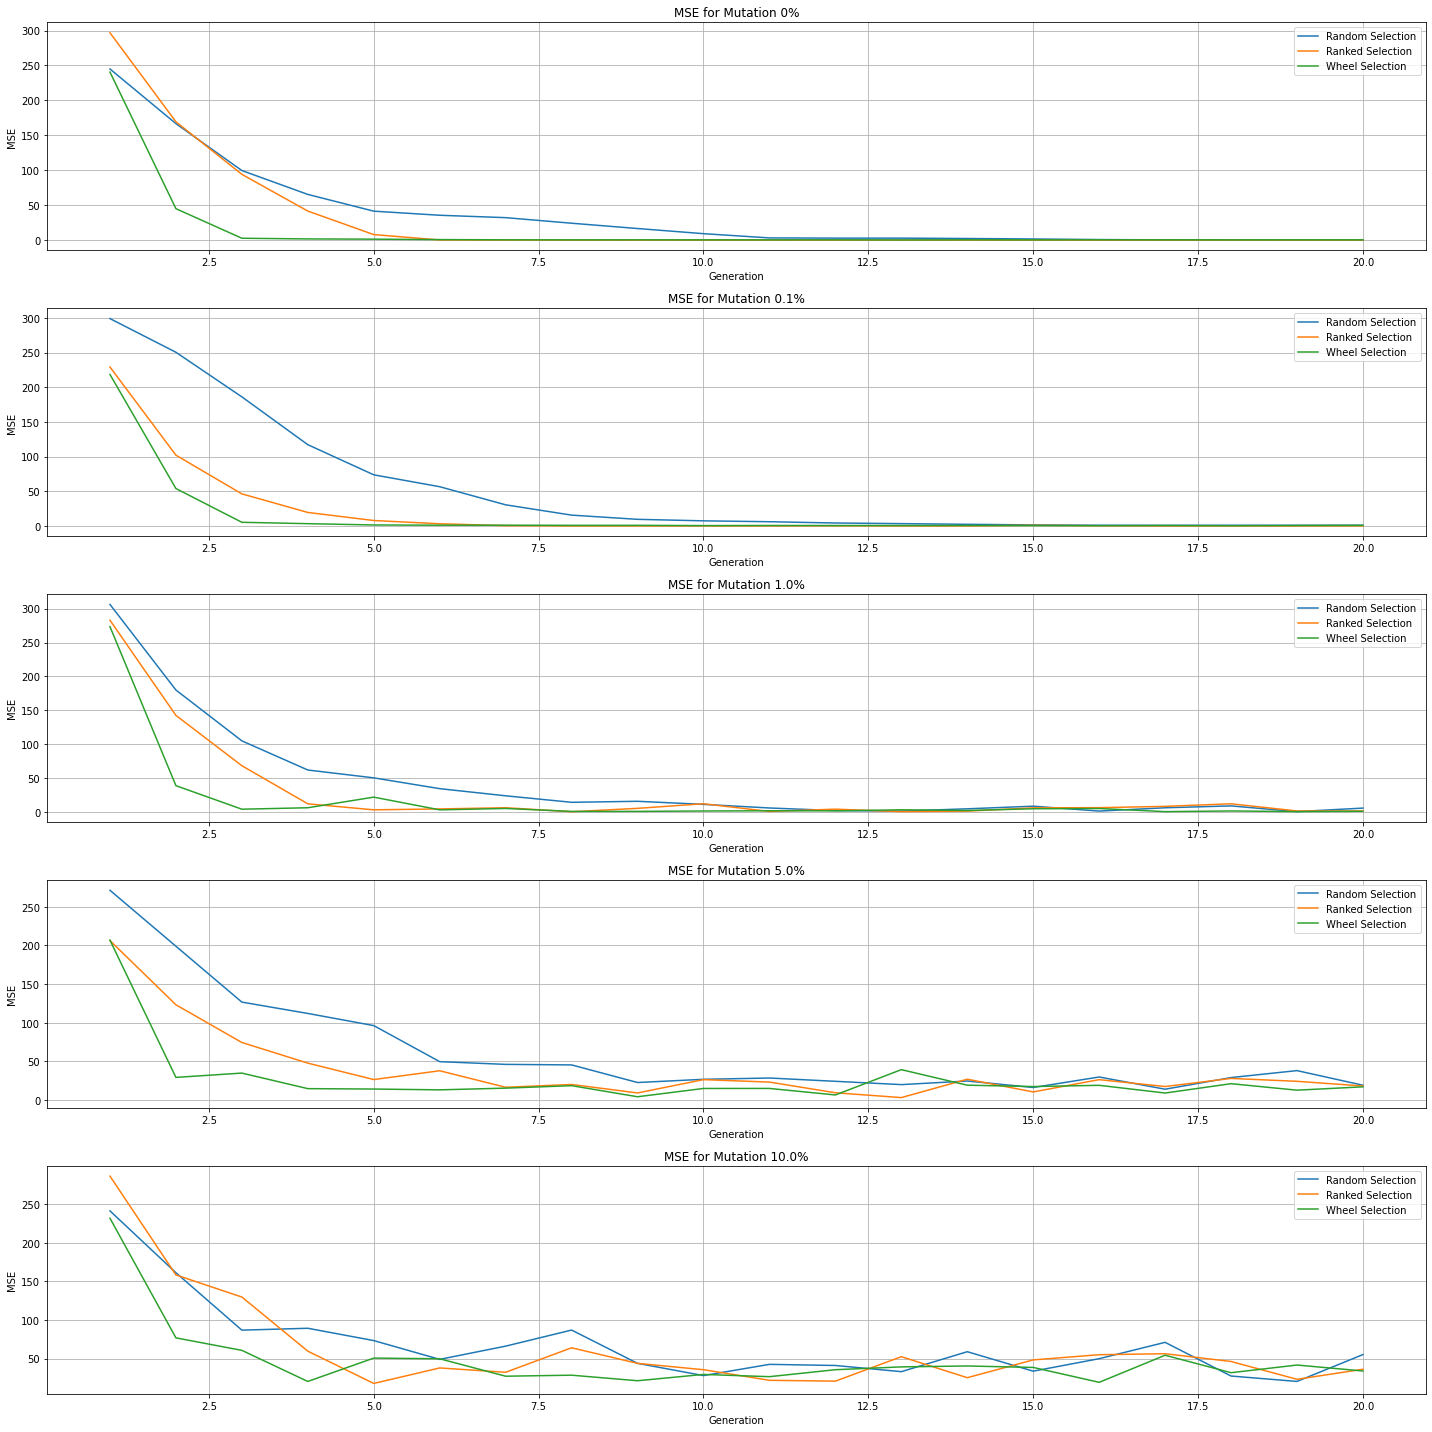

In [62]:
# Plotting the results
plt.rcParams["figure.figsize"] = (20, 20)
i=1
for mutation_rate in mutation_rates:
    plt.subplot(5,1,i)
    plt.plot(range(1, number_of_generations+1), mse_results[mutation_rate]['Random Selection'], label='Random Selection')
    plt.plot(range(1, number_of_generations+1), mse_results[mutation_rate]['Ranked Selection'], label='Ranked Selection')
    plt.plot(range(1, number_of_generations+1), mse_results[mutation_rate]['Wheel Selection'], label='Wheel Selection')

    plt.title(f'MSE for Mutation {mutation_rate*100}%')
    plt.xlabel('Generation')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid()

    i+=1
plt.tight_layout()
plt.show()


We can see that Wheel selection coverges before the other two methods, while Ranked selection minimizes the error once it has converged towards the optimal solution.

# Conclusions
After the analysis we conclude that:
- Mutation rates between 0.1% and 1% are optimal
- All selections methods converge around 25 generations therefore there is no benefit exceding that generation cap
- Genetic diversity from generation sizes of greater than 60 individuals offers no further advantages
- Radius binary encoding greater than 11 bits offers no additional error reduction
- Analyzing generation means yields a closer result to the theoretical ideal value
- Random selection is the most computationally cheap of the three methods, while also managing to converge towards the ideal result 
- Wheel selection converges faster than the other two methods
- Ranked selection finds the solution faster and with a better accuracy while minizing errors

